# Chaikin Money Flow Indicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volume import ChaikinMoneyFlowIndicator

In [16]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

CMF 50 is best at -0.14

In [17]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "cmf_"
    for w in windows:
        cmf = ChaikinMoneyFlowIndicator(df.high, df.low, df.close, df.volume, window=w)
        df[name + str(w)] = cmf.chaikin_money_flow()

In [18]:
variations([30, 40, 50, 60, 70])

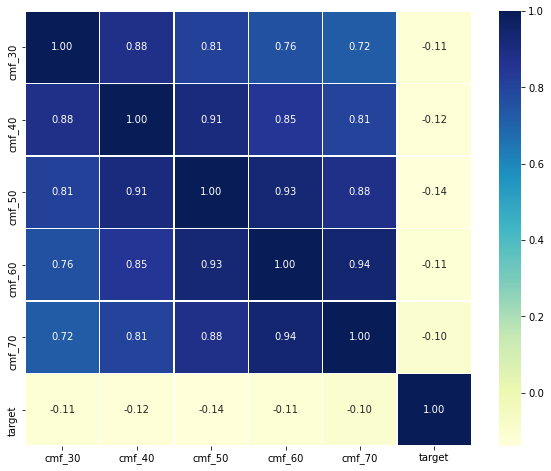

In [19]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

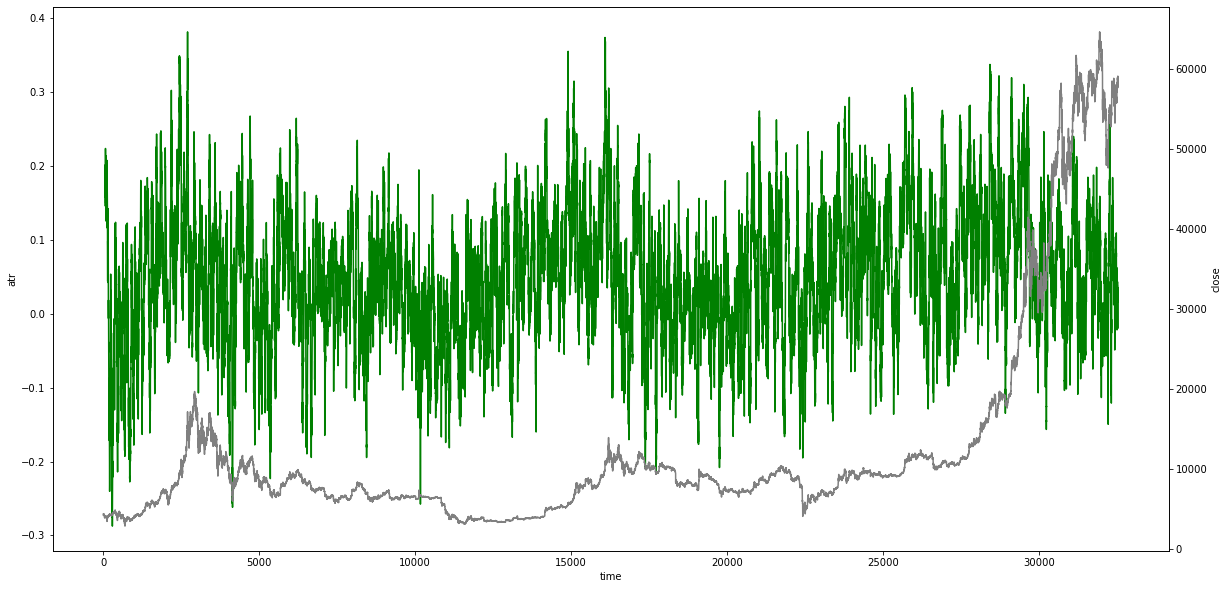

In [20]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.cmf_50,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Looks good, random testing

In [50]:
df["sma_200"] = uf.get_moving_average(df.cmf_50, 200)
df["rate_200"] = uf.get_rate(df.sma_200)
df["sma_20"] = uf.get_moving_average(df.cmf_50, 20)
df["rate"] = uf.get_rate(df.sma_20)
df["sma_20_2"] = uf.get_moving_average(df.rate, 200)
df["rate_2"] = uf.get_rate(df.sma_20_2)

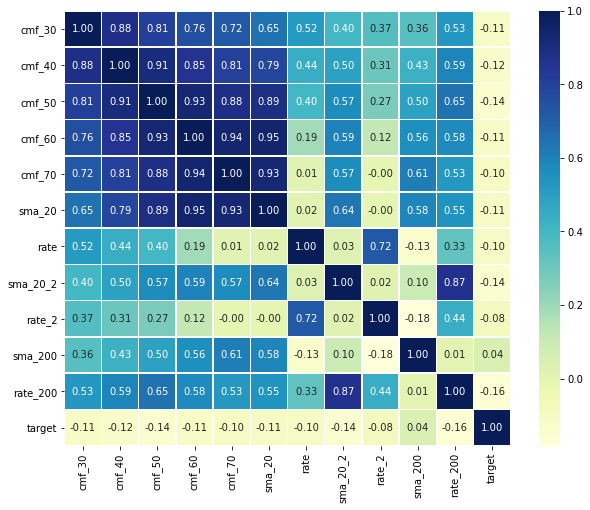

In [51]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

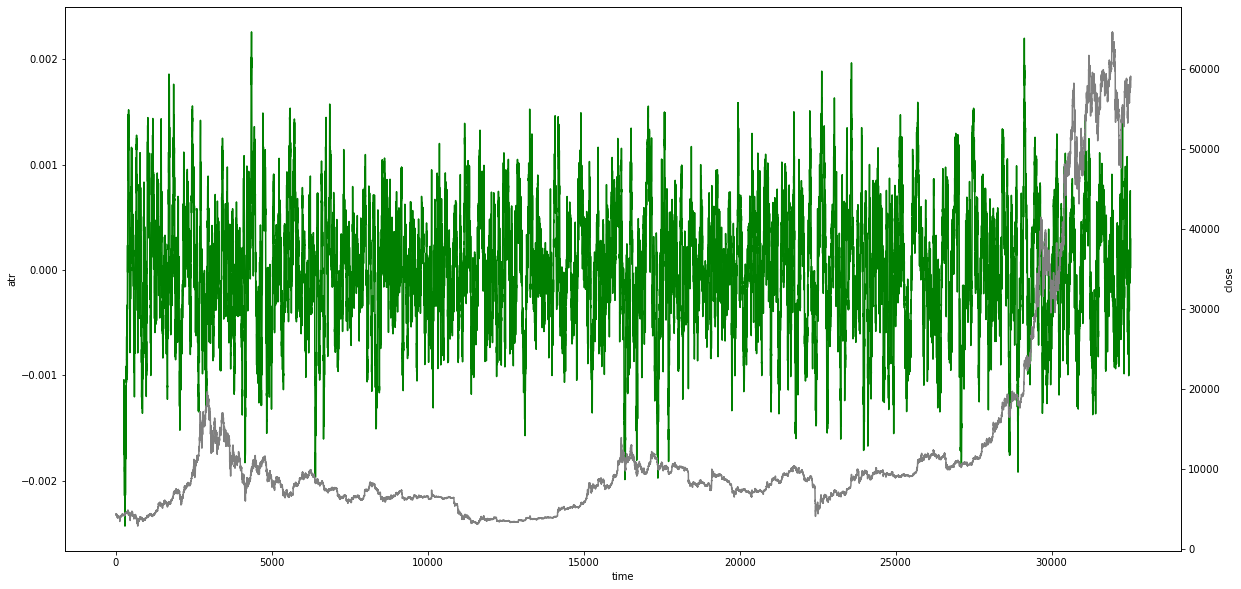

In [41]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.rate,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Conclusion
Default with window 50 and rate with same 200